[# Computational Photonics]:#

[## Homework 1: Implementation of a Finite-Difference Mode Solver]:#

[Author:]:#
[| Name             | Email       |
| -----------      | ----------- |
| *Udit Banerjee*    |             |
| *John Fearnhead*   |             |
|                  |             |
| *Yucheng Sun*      |             |
]:#
[Supervisor:]:#
[>Prof. Thomas Pertsch]:#


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import FormatStrFormatter
import scipy as sp
import scipy.sparse as sps
from scipy.sparse.linalg import eigs
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

**Table of contents**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
- 2. [Finite Difference Methods](#toc2_)    
- 3. [Analysis and Simulation of the Problems](#toc3_)    
  - 3.1. [Guided modes in 1+1=2D systems (TE modes)](#toc3_1_)    
    - 3.1.1. [Discussion of physical properties of numerical solutions](#toc3_1_1_)    
    - 3.1.2. [Discussion of numerical properties of numerical solutions](#toc3_1_2_)    
  - 3.2. [Guided modes in 2+1=3D systems (strip waveguide) in scalar approximation](#toc3_2_)    
    - 3.2.1. [Discussion of physical properties of numerical solutions](#toc3_2_1_)    
    - 3.2.2. [Discussion of numerical properties of numerical solutions](#toc3_2_2_)    
- 4. [Conclusions](#toc4_)    
- 5. [References](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)

## 2. <a id='toc2_'></a>[Finite Difference Methods](#toc0_)

## 3. <a id='toc3_'></a>[Analysis and Simulation of the Problems](#toc0_)


### 3.1. <a id='toc3_1_'></a>[Guided modes in 1+1=2D systems (TE modes)](#toc0_)


In [2]:
def guided_modes_1DTE(prm, k0, h):
    """Computes the effective permittivity of a TE polarized guided eigenmode.
    All dimensions are in µm.
    Note that modes are filtered to match the requirement that
    their effective permittivity is larger than the substrate (cladding).
    
    Parameters
    ----------
    prm : 1d-array
        Dielectric permittivity in the x-direction
    k0 : float
        Free space wavenumber
    h : float
        Spatial discretization
    
    Returns
    -------
    eff_eps : 1d-array
        Effective permittivity vector of calculated modes
    guided : 2d-array
        Field distributions of the guided eigenmodes
    """
    dt = np.common_type(np.array([prm]))
    # Construct the matrix M and B for the gernerlized eigenvalue problem
    M  = np.zeros((len(prm),len(prm)), dtype = dt)
    for i in range(len(prm)):
        M[i][i] =  -2/(h**2) + (k0**2) * prm[i]
        if i > 0:
            M[i][i-1] = 1/(h**2) 
        if i < len(prm) - 1:
            M[i][i+1] = 1/(h**2)
    M  = (1/(k0**2)) * M
    eff_eps, guided = np.linalg.eig(M)
    return eff_eps, guided


- Define and generate the parameters

In [3]:
grid_size     = 120
number_points = 601
h             = grid_size/(number_points - 1)
lam           = 0.78
k0            = 2*np.pi/lam
e_substrate   = 2.25
delta_e       = 1.5e-2
w             = 15.0
xx            = np.linspace( -grid_size/2, grid_size/2, number_points )
prm           = e_substrate + delta_e * np.exp(-(xx/w)**2)

# Compute the eigenvalues and eigenvectors
eff_eps, guided = guided_modes_1DTE(prm, k0, h)

- Selection of modes (effective permittivity and field distribution)

selected_eff_eps:  2.2602766289446756
selected_guided:  [-2.92260134e-15 -5.62601621e-15 -6.13610439e-15 -5.32506176e-15
 -6.42759456e-15 -7.90129827e-15 -8.57545315e-15 -8.78045278e-15
 -6.92754233e-15 -3.83650977e-15  1.68509664e-15  9.08087586e-15
  1.44497363e-14  1.93012057e-14  2.29375814e-14  2.34804749e-14
  2.08280126e-14  1.67284969e-14  1.26075355e-14  8.02717445e-15
  5.16364427e-15  2.38227935e-15 -1.69984512e-15 -4.16218269e-15
 -4.87448927e-15 -3.94229039e-15 -1.81246632e-15  1.47862081e-15
  5.74107638e-15  9.58249997e-15  1.27348107e-14  1.34851950e-14
  1.15494060e-14  5.96424866e-15  6.80502545e-16 -3.87995062e-15
 -6.11317489e-15 -7.54138834e-15 -1.00089101e-14 -9.18726554e-15
 -9.28916049e-15 -8.73393773e-15 -9.85969170e-15 -1.38991450e-14
 -1.63850713e-14 -1.75766706e-14 -1.92910668e-14 -1.80573813e-14
 -1.44728670e-14 -7.77838590e-15  5.46033397e-18  5.93448466e-15
  1.19099209e-14  1.99098818e-14  2.67954423e-14  2.97602294e-14
  3.21031965e-14  3.69512977e-14  

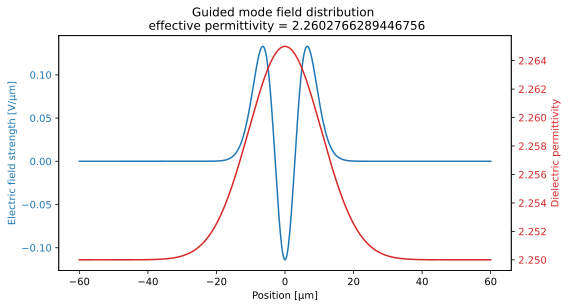

In [5]:
# Filter the eigenvalues and eigenvectors
## Find the indices of the eigenvalues within the given range
indices = np.where((eff_eps >= e_substrate) & (eff_eps <= e_substrate + delta_e))[0]

## Extract the eigenvalues and eigenvectors within the range
selected_eff_eps = eff_eps[indices]
selected_guided = (np.transpose(guided))[indices]
mode_ind = int(2)
print('selected_eff_eps: ', selected_eff_eps[mode_ind])
print('selected_guided: ', selected_guided[mode_ind])

# Plot the eigenvalues and eigenvectors
x = xx
y1 = selected_guided[mode_ind]
y2 = prm

fig, ax1 = plt.subplots(figsize=(8, 4))

color = 'tab:blue'
ax1.set_xlabel('Position [µm]')
ax1.set_ylabel('Electric field strength [V/µm]', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Dielectric permittivity', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Guided mode field distribution \n effective permittivity = ' + str(selected_eff_eps[mode_ind]))
plt.show()

#### 3.1.1. <a id='toc3_1_1_'></a>[Discussion of physical properties of numerical solutions](#toc0_)

#### 3.1.2. <a id='toc3_1_2_'></a>[Discussion of numerical properties of numerical solutions](#toc0_)

### 3.2. <a id='toc3_2_'></a>[Guided modes in 2+1=3D systems (strip waveguide) in scalar approximation](#toc0_)

In [26]:
def guided_modes_2D(prm, k0, h, numb):
    """Computes the effective permittivity of a quasi-TE polarized guided 
    eigenmode. All dimensions are in µm.
    
    Parameters
    ----------
    prm  : 2d-array
        Dielectric permittivity in the xy-plane
    k0 : float
        Free space wavenumber
    h : float
        Spatial discretization
    numb : int
        Number of eigenmodes to be calculated
    
    Returns
    -------
    eff_eps : 1d-array
        Effective permittivity vector of calculated eigenmodes
    guided : 2d-array
        Field distributions of the guided eigenmodes
    """
    dt = np.common_type(np.array([prm]))
    # M  = np.zeros((np.size(prm), np.size(prm)), dtype = dt)
    # for i  in range(np.size(prm)):
    #     M[i][i] =  -4/(h**2) + (k0**2) * prm.flatten()[i]
    #     if i > 0 & i % np.size(prm,1) != 0:
    #         M[i][i-1] = 1/(h**2)
    #     if i < len(prm) - 1 & i % np.size(prm,1) != np.size(prm,1) - 1:
    #         M[i][i+1] = 1/(h**2)
    #     if i >= np.size(prm,1):
    #         M[i][i-np.size(prm,1)] = 1/(h**2)
    #     if i < len(prm) - np.size(prm,1):
    #         M[i][i+np.size(prm,1)] = 1/(h**2)
    # M  = (1/(k0**2)) * M
    # Set the diagonal elements
    diagonals = np.zeros((5, np.size(prm)))
    diagonals[0] = -4/(h**2) + (k0**2) * prm.flatten()
    for i in range(np.size(prm) - 1):
        if i % len(prm[0]) != len(prm[0]) - 1:
            diagonals[1][i] = 1/(h**2)
        if i % len(prm[0]) != 0:
            diagonals[2][i] = 1/(h**2)
        if i < np.size(prm) - len(prm[0]):
            diagonals[3][i] = 1/(h**2)
        if i >= len(prm[0]):
            diagonals[4][i] = 1/(h**2)
    diag_position = [0, 1, -1, len(prm[0]), -len(prm[0])]
    # Create a sparse 2D array with the diagonal elements
    M = sps.diags(diagonals, diag_position)
    M = (1/(k0**2)) * M
    # Compute the eigenvalues and eigenvectors
    eff_eps, guided = sps.linalg.eigs(M, k = numb, which = 'LR')
    return eff_eps, guided

- Define and generate the parameters

In [27]:
# Define the parameters
grid_size     = 120
number_points = 301
h             = grid_size/(number_points - 1)
lam           = 0.78
k0            = 2*np.pi/lam
e_substrate   = 2.25
delta_e       = 1.5e-2
w             = 15.0
xx            = np.linspace(-grid_size/2 - h, grid_size/2 + h,number_points + 2)
yy            = np.linspace(-grid_size/2,grid_size/2,number_points)
XX,YY         = np.meshgrid(xx,yy)
prm           = e_substrate + delta_e * np.exp(-(XX**2+YY**2)/w**2)
numb          = 2

# Compute the eigenvalues and eigenvectors
eff_eps, guided = guided_modes_2D(prm, k0, h, numb)
guided = np.transpose(guided)

- Selection of modes (effective permittivity and field distribution)

[2.26304305+0.j 2.26115868+0.j]


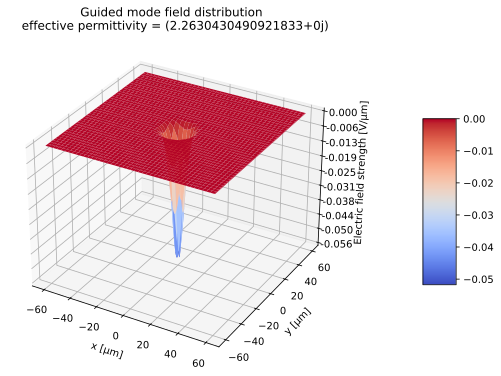

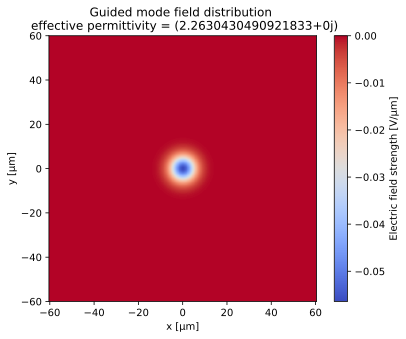

In [29]:
mode_ind = 0
print(eff_eps)
# print(guided)

# Plot the eigenmode(3d plot)
X, Y = XX, YY
Z = np.real(guided[mode_ind].reshape((number_points , number_points + 2)))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(30, 6))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
## Customize the z axis.
ax.set_zlim(np.min(Z), np.max(Z))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_title('Guided mode field distribution \n effective permittivity = ' + str(eff_eps[mode_ind]))
ax.set_xlabel('x [µm]', fontsize=10)
ax.set_ylabel('y [µm]', fontsize=10)
ax.set_zlabel('Electric field strength [V/µm]', fontsize=10)
Z_formatter = FormatStrFormatter('%.3f')
ax.zaxis.set_major_formatter(Z_formatter)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Plot the eigenmode(2d plot)
X, Y = XX, YY
Z = np.real(guided[mode_ind].reshape((number_points , number_points + 2)))
fig, ax = plt.subplots()
im = ax.imshow(Z, cmap='coolwarm', extent=[-grid_size/2 - h , grid_size/2 + h, -grid_size/2, grid_size/2])
fig.colorbar(im, ax=ax, label='Electric field strength [V/µm]')
ax.set_title('Guided mode field distribution \n effective permittivity = ' + str(eff_eps[mode_ind]))
ax.set_xlabel('x [µm]')
ax.set_ylabel('y [µm]')
plt.show()

#### 3.2.1. <a id='toc3_2_1_'></a>[Discussion of physical properties of numerical solutions](#toc0_)

#### 3.2.2. <a id='toc3_2_2_'></a>[Discussion of numerical properties of numerical solutions](#toc0_)

## 4. <a id='toc4_'></a>[Conclusions](#toc0_)

## 5. <a id='toc5_'></a>[References](#toc0_)